### Exercise 2

In [109]:
import numpy as np
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

In [110]:
# define labor demand, profit, and labor supply functions
LD = lambda α, z, w, k: (((1 - α) * z) / w) ** (1 / α) * k
π = lambda α, z, w, k: z * k ** α * LD(α, z, w, k) ** (1 - α) - w * LD(α, z, w, k)
LS = lambda h, b, t, α, z, w, k: h - (b / (w * (1 + b))) * (w * h + π(α, z, w, k) - t)

In [111]:
# set parameters
α = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

In [112]:
# LD - LS
def solve_w_eq(w, params):
    h, b, t, α, z, k = params
    return LD(α, z, w, k) - LS(h, b, t, α, z, w, k)

In [113]:
# solve for equilibrium wage that makes LD - LS = 0
w_eq = lambda k, params=[h, b, t, α, z]: fsolve(solve_w_eq, .01, args=[h, b, t, α, z, k])
    
w = w_eq(k, [h, b, t, α, z])    
print("Equilibrium wage:", w)

Equilibrium wage: [0.62736178]


In [114]:
# first and second derivative functions
fprime = lambda f, x, h=1e-3: (f(x + h) - f(x - h)) / (2 * h)
fprime2 = lambda f, x, h=1e-3: (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

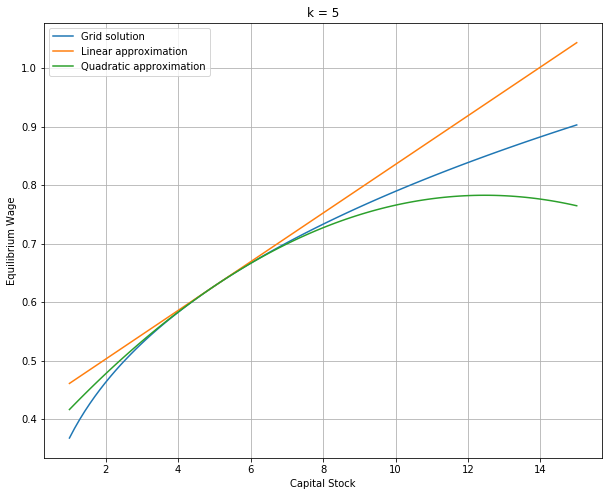

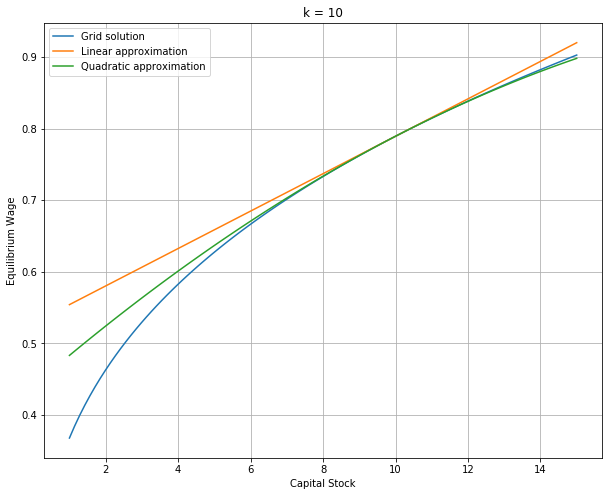

In [115]:
ks = [5, 10]
for k in ks:
    k_grid = np.linspace(1, 15, 100)
    
    # first- and second-order approximations
    linear_approx = w_eq(k) + fprime(w_eq, k) * (k_grid - k)
    quadratic_approx = w_eq(k) + fprime(w_eq, k) * (k_grid - k) + (fprime2(w_eq, k) * (k_grid - k) ** 2) / 2

    # grid solution
    w_grid = np.empty_like(k_grid)
    for i, k_i in enumerate(k_grid):
        w_grid[i] = w_eq(k_i)

    plt.figure(figsize=(10, 8))
    plt.plot(k_grid, w_grid, label="Grid solution")
    plt.plot(k_grid, linear_approx, label="Linear approximation")
    plt.plot(k_grid, quadratic_approx, label="Quadratic approximation")
    plt.xlabel("Capital Stock")
    plt.ylabel("Equilibrium Wage")
    plt.title(f'k = {k}')
    plt.legend()
    plt.grid()
    plt.show()

### Exercise 3

In [116]:
# function F
F = lambda y, x: (x ** 0.35 + 0.9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)

In [117]:
# third derivative function
fprime3 = lambda f, x, h=1e-3: (f(x + 2 * h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2 * h)) / (2 * (h ** 3))

In [118]:
# solve for equilibrium y given x
y = lambda x: fsolve(F, 45, args=x)

In [119]:
y(100)

array([47.46578754])

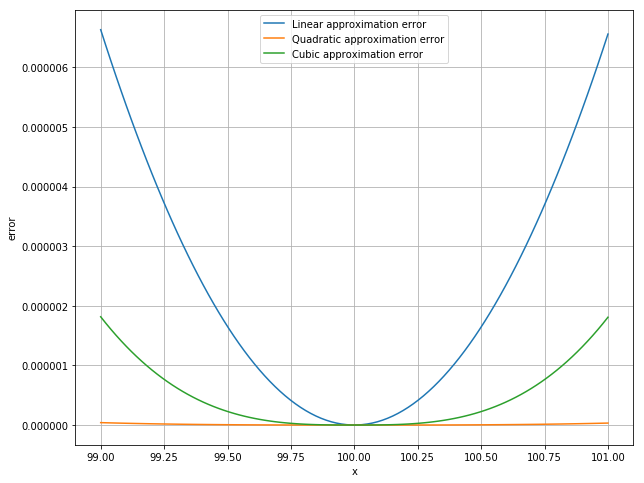

In [120]:
x_grid = np.linspace(99, 101, 100)
x0 = 100

# first-, second-, and third-order approximations
linear_approx = y(x0) + fprime(y, x0) * (x_grid - x0)
quadratic_approx = y(x0) + fprime(y, x0) * (x_grid - x0) + (fprime2(y, x0) * (x_grid - x0) ** 2) / 2
cubic_approx = y(x0) + fprime(y, x0) * (x_grid - x0) + (fprime2(y, x0) * (x_grid - x0) ** 2) / 2 + (fprime3(y, x0) * (x_grid - x0) ** 3) / 6

# grid solution
y_grid = np.empty_like(x_grid)
for i, x in enumerate(x_grid):
    y_grid[i] = y(x)
    
plt.figure(figsize=(10, 8))
plt.plot(x_grid, np.abs(y_grid - linear_approx), label="Linear approximation error")
plt.plot(x_grid, np.abs(y_grid - quadratic_approx), label="Quadratic approximation error")
plt.plot(x_grid, np.abs(y_grid - cubic_approx), label="Cubic approximation error")
plt.xlabel("x")
plt.ylabel("error")
plt.legend()
plt.grid()
plt.show()

### Exercise 4-6

In [121]:
# modeled off of Chase's notebook
import dolo

In [122]:
fname = "Perturbations.yaml"
dolo.pcat(fname)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41


In [123]:
mod = dolo.yaml_import(fname)

In [124]:
mod

Model:
------
name: "BrockMirmanModel"
type: "dtcscc"
file: "Perturbations.yaml

Equations:
----------

transition
 1  : 0.0000 : k = i(-1)
 2  : 0.0000 : z = rho * z(-1) + e_z

arbitrage
 1  : 0.0000 : 1 - beta*(c/c(1))*rk(1)    | 0.0 <= i <= inf

In [125]:
dr_perturb = dolo.perturbate(mod, solve_steady_state=True)

AttributeError: module 'dolo' has no attribute 'perturbate'